In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
data_raw = pd.read_csv('marketing_campaign.csv', sep=';' )

In [169]:
from datetime import datetime 

# criar coluna para ano atual e data atual
current_year = datetime.now().year
data_raw['Current_Year'] = current_year

current_date = pd.to_datetime('now').strftime("%Y-%m-%d")
data_raw['Current_Date'] = current_date
data_raw['Current_Date'] = pd.to_datetime(data_raw['Current_Date'])

# criar coluna de idade
data_raw['Age'] = data_raw['Current_Year'] - data_raw['Year_Birth']

# criar coluna que mostra há quanto o cliente é cliente
data_raw[['Current_Date','Dt_Customer']] = data_raw[['Current_Date','Dt_Customer']].apply(pd.to_datetime)
data_raw['House_Time'] = ((data_raw['Current_Date'] - data_raw['Dt_Customer']) / np.timedelta64(1, 'M'))
data_raw['House_Time'] = data_raw['House_Time'].astype('int64')

data_raw = data_raw[data_raw['Marital_Status'] != 'Absurd']

/home/raissa.ferreira/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [170]:
def age_rate(x):
    if x <= 20:
        return '<= 20'
    if x <= 30:
        return '21 - 30'    
    if x <= 40:
        return '31 - 40' 
    if x <= 50:
        return '41 - 50'    
    if x <= 60:
        return '51 - 60'    
    else:
        return ' > 60'

data_raw['Age_Rate'] =  data_raw['Age'].apply(age_rate)

In [171]:
def income_rate(x):
    if x <= 10000:
        return '<= 10000'
    if x <= 20000:
        return '10001 - 20000'    
    if x <= 30000:
        return '20001 - 30000' 
    if x <= 40000:
        return '30001 - 40000'    
    if x <= 50000:
        return '40001 - 50000'    
    if x <= 60000:
        return '50001 - 60000'  
    if x <= 70000:
        return '60001 - 70000'  
    if x <= 80000:
        return '70001 - 80000'  
    else:
        return ' > 80000'

data_raw['Income_Rate'] =  data_raw['Income'].apply(income_rate)

In [178]:
#education

aux1 = data_raw[data_raw['AcceptedCmp1'] == 1].groupby(['Education'])['ID'].count()
aux2 = data_raw[data_raw['AcceptedCmp2'] == 1].groupby(['Education'])['ID'].count()
aux3 = data_raw[data_raw['AcceptedCmp3'] == 1].groupby(['Education'])['ID'].count()
aux4 = data_raw[data_raw['AcceptedCmp4'] == 1].groupby(['Education'])['ID'].count()
aux5 = data_raw[data_raw['AcceptedCmp5'] == 1].groupby(['Education'])['ID'].count()
aux_base = data_raw.groupby(['Education'])['ID'].count()

# Merge orders data_
from functools import reduce

dfs = [aux1, aux2, aux3, aux4, aux5,aux_base]
df_education_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Education'], how='inner'), dfs)

df_education_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5', 'qty_base' ]

#Marital_Status

aux1 = data_raw[data_raw['AcceptedCmp1'] == 1].groupby(['Marital_Status'])['ID'].count()
aux2 = data_raw[data_raw['AcceptedCmp2'] == 1].groupby(['Marital_Status'])['ID'].count()
aux3 = data_raw[data_raw['AcceptedCmp3'] == 1].groupby(['Marital_Status'])['ID'].count()
aux4 = data_raw[data_raw['AcceptedCmp4'] == 1].groupby(['Marital_Status'])['ID'].count()
aux5 = data_raw[data_raw['AcceptedCmp5'] == 1].groupby(['Marital_Status'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_marital_status_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Marital_Status'], how='inner'), dfs)

df_marital_status_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

#Age_Rate

aux1 = data_raw[data_raw['AcceptedCmp1'] == 1].groupby(['Age_Rate'])['ID'].count()
aux2 = data_raw[data_raw['AcceptedCmp2'] == 1].groupby(['Age_Rate'])['ID'].count()
aux3 = data_raw[data_raw['AcceptedCmp3'] == 1].groupby(['Age_Rate'])['ID'].count()
aux4 = data_raw[data_raw['AcceptedCmp4'] == 1].groupby(['Age_Rate'])['ID'].count()
aux5 = data_raw[data_raw['AcceptedCmp5'] == 1].groupby(['Age_Rate'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_Age_Rate_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Age_Rate'], how='inner'), dfs)

df_Age_Rate_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

#Income_Rate

aux1 = data_raw[data_raw['AcceptedCmp1'] == 1].groupby(['Income_Rate'])['ID'].count()
aux2 = data_raw[data_raw['AcceptedCmp2'] == 1].groupby(['Income_Rate'])['ID'].count()
aux3 = data_raw[data_raw['AcceptedCmp3'] == 1].groupby(['Income_Rate'])['ID'].count()
aux4 = data_raw[data_raw['AcceptedCmp4'] == 1].groupby(['Income_Rate'])['ID'].count()
aux5 = data_raw[data_raw['AcceptedCmp5'] == 1].groupby(['Income_Rate'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_Income_Rate_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Income_Rate'], how='inner'), dfs)

df_Income_Rate_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

/tmp/ipykernel_20251/3675878570.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_education_comparison = reduce(lambda  left,right: pd.merge(
/tmp/ipykernel_20251/3675878570.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_education_comparison = reduce(lambda  left,right: pd.merge(
/tmp/ipykernel_20251/3675878570.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_marital_status_comparison = reduce(lambda  left,right: pd.merge(


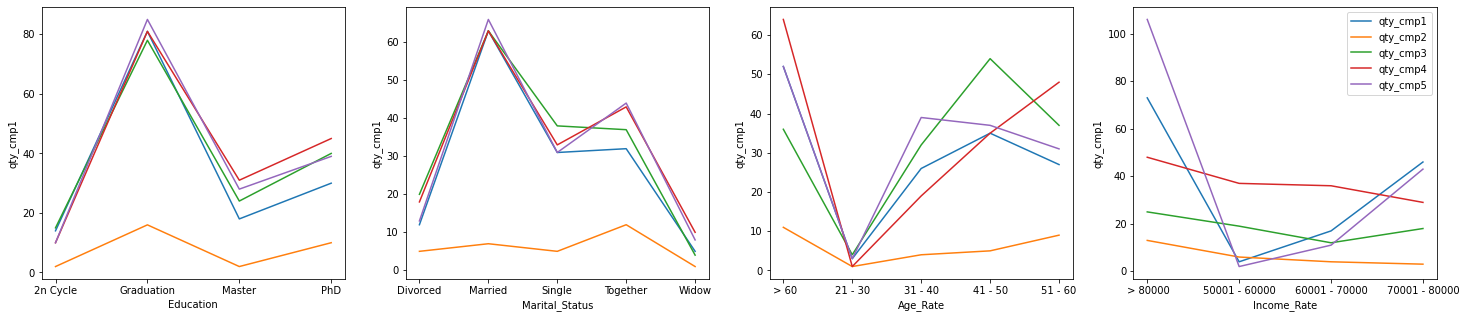

In [181]:
f, ax = plt.subplots(1,4,figsize=(25,5))

g1 = sns.lineplot(x='Education', y='qty_cmp1', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp2', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp3', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp4',ax=ax[0],  data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp5',ax=ax[0],  data=df_education_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g2 = sns.lineplot(x='Marital_Status', y='qty_cmp1', ax=ax[1], data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp2',ax=ax[1],  data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp3', ax=ax[1], data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp4',ax=ax[1],  data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp5',ax=ax[1],  data=df_marital_status_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g3 = sns.lineplot(x='Age_Rate', y='qty_cmp1',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp2',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp3',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp4', ax=ax[2],data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp5',ax=ax[2], data=df_Age_Rate_comparison)
g3 = plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g4 = sns.lineplot(x='Income_Rate', y='qty_cmp1', ax=ax[3],data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp2',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp3',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp4',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp5',ax=ax[3], data=df_Income_Rate_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])
